In [4690]:
import torch 
import glob
import random
import os
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import sys

In [2]:
import torchvision
from torch.utils.data import Dataset
from PIL import Image

In [3]:
from models import *
from data import *

In [4]:
epoch = 0
n_epochs = 200 #default = 200
batchSize = 1
dataroot = './testcollection'
loadSize = 143
fineSize = 128
ngf = 64
ndf = 64    
in_nc = 3 
out_nc = 3 
niter = 100  
niter_decay = 100 
lr = 0.0002 
beta1 = 0.5 
#ntrain = math.huge 
flip = 1  
display_id = 10 
display_winsize = 128 
display_freq = 25 
cuda=False

In [5]:
gen = Generator(in_nc,out_nc,4,ngf)

In [3609]:
gen.load_state_dict(torch.load('./netG3.pth',map_location='cpu'))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3610]:
gen.eval()

Generator(
  (encoder): Encoder(
    (model): Sequential(
      (0): ReflectionPad2d((3, 3, 3, 3))
      (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
      (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): ReLU(inplace)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): ReLU(inplace)
      (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (9): ReLU(inplace)
    )
  )
  (transformer): Transformer(
    (t): ModuleList(
      (0): ResidualBlock(
        (conv_block): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
          (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_runnin

In [4595]:
transforms_ = [ transforms.Resize(int(128), Image.BICUBIC), 
        transforms.RandomCrop(128), 
        transforms.RandomVerticalFlip(p=0),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) 
      ]

transform = transforms.Compose(transforms_)

In [4703]:
content = transform(Image.open('./IMG_0931.jpeg'))

In [4704]:
Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor
input_A = Tensor(batchSize, in_nc, fineSize, fineSize)

In [4705]:
def tensor2image(tensor):
    image = 127.5*(tensor[0].cpu().float().detach().numpy() + 1.0)
    if image.shape[0] == 1:
        image = np.tile(image, (3,1,1))
    return image.astype(np.uint8)

# ###### Testing#####

In [4706]:
real_A = Variable(input_A.copy_(content))

In [4742]:
generated= gen({
    'content': real_A,
    'style_label': [[.1,.9,.09,.09,0]]
})

In [4743]:
im=tensor2image(generated.data)

In [4744]:
im =im.transpose(2,1,0)

In [4745]:
thing=Image.fromarray(im,'RGB')

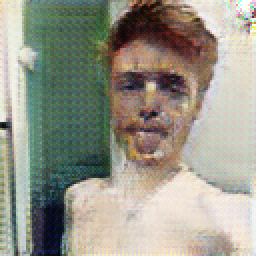

In [4746]:
thing.resize([256,256])

## %matplotlib inline

In [3964]:
thing.show()

In [ ]:
class ImageStyler():
    def __init__(self, image_path, generator):
        self.image_path = image_path
        self.generator = generator
        
    def 
        